<a href="https://colab.research.google.com/github/VictorOPreuss/Desafio-EDA-Trybe/blob/master/Desafio_EDA_Trybe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio EDA - Trybe**
### Este notebook é um exemplo de EDA para a base de dados pública [*Mental Health in Tech Survey*](https://www.kaggle.com/osmi/mental-health-in-tech-survey), disponibilizada pela **Open Sourcing Mental Illness, LTD**.

### O estudo está sendo feito para uma instituição que encomendou a pesquisa com o intuito de vincular a mesma em um grande site de *review* de empresas.

### Algumas das perguntas a serem respondidas com a análise exploratória da base de dados são:

### **- Existe alguma associação entre profissionais que buscaram tratamento e o gênero no qual se identificam?**
### **- Existe uma relação entre as pessoas colaboradoras que buscaram tratamento e que possuem histórico familiar de doenças mentais?**
### **- O tamanho da empresa influencia na frequência de pessoas colaboradoras que buscaram tratamento para saúde mental?**
### **- As empresas que possuem programas de bem-estar tem uma frequência menor de respondentes que buscaram tratamento para doenças mentais?**
### **- As empresas que possuem benefícios para saúde mental tem uma frequência menor de respondentes que buscaram tratamento para doenças mentais?**


# **Bibliotecas**

In [ ]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sct
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Dados**

In [ ]:
# Upload kaggle.json API key file

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
jmmvutu/summer-products-and-sales-in-ecommerce-wish               Sales of summer clothes in E-commerce Wish        376KB  2020-08-23 15:16:46           2322  
Cornell-University/arxiv                                          arXiv Dataset                                     877MB  2020-08-14 23:50:57           1993  
agirlcoding/all-space-missions-from-1957                          All Space Missions from 1957                      101KB  2020-08-13 16:18:58           1390  
landlord/handwriting-recognition                                  Handwriting Recognition                             1GB  2020-08-05 17:20:36            456  
andrewmvd/heart-failure-clinical-data   

In [ ]:
!kaggle datasets download -d osmi/mental-health-in-tech-survey

  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 18.1MB/s]


In [ ]:
! unzip mental-health-in-tech-survey.zip -d data

Archive:  mental-health-in-tech-survey.zip
  inflating: data/survey.csv         


In [ ]:
data = pd.read_csv('data/survey.csv')

# **Funções**

In [ ]:
# FUNÇÕES

def missing_values_table(df):

  """ 
  Função para apresentar as variáveis que possuem valores faltantes, tanto em quantidade como frequência
  dentro dos valores observados.

  :param df: Dataframe que se deseja analisar.
  :return: Tabela com as variáveis que possuem dados faltantes, a quantidade e frequência. 
  """

  # Total missing values
  mis_val = df.isnull().sum()
    
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
        
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
  mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
        
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
      " columns that have missing values.")
        
   # Return the dataframe with missing information
  return mis_val_table_ren_columns

def percent_value_counts(df, feature):
    """
    Função que traz a frequência em porcentagem dos valores presentes em determinada coluna de determinado DataFrame.

    :param df: DataFrame a ser analisado.
    :param feature: Coluna a ser analisada.
    :return: Tabela com os dados únicos, e referente frequência na coluna, em order decrescente.
    """

    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

# **EDA**

## **Shape e amostragem da base de dados**

Vamos começar analisando registros aleatórios de todas as colunas para entender um pouco dos dados da base.

In [ ]:
print(data.shape)
data.sample(5)

(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
131,2014-08-27 12:35:23,32,male,United States,CA,No,No,No,Rarely,1-5,Yes,Yes,No,Yes,No,No,Don't know,Very difficult,Maybe,No,Yes,Some of them,No,Yes,Don't know,No,NaN
1041,2014-08-29 11:20:13,33,Male,United States,NY,No,No,No,NaN,6-25,Yes,Yes,Yes,No,Don't know,Yes,Yes,Don't know,No,No,Some of them,Yes,No,No,Yes,No,NaN
129,2014-08-27 12:34:51,19,male,Slovenia,NaN,No,No,Yes,Sometimes,6-25,No,Yes,Don't know,No,No,No,Don't know,Somewhat easy,Yes,Yes,Some of them,No,No,No,Don't know,No,NaN
963,2014-08-29 05:39:21,24,M,United Kingdom,NaN,Yes,Yes,No,Often,1-5,Yes,Yes,Don't know,Not sure,No,No,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,Maybe,Don't know,No,NaN
13,2014-08-27 11:33:26,36,Male,United States,CT,NaN,Yes,No,Never,500-1000,No,Yes,Don't know,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,No,Don't know,No,I'm not on my company's health insurance which...


Podemos ver que grande parte dos dados são categóricos, temos um tipo de data/hora (*Timestamp*) e um numérico (*Age*). Agora, vamos entender um pouco mais sobre os tipos de dados de cada coluna, e se há valores faltantes.

## **Tipos de dados e valores faltantes**

In [ ]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Valores faltantes na base de dados
missing_values = missing_values_table(data)
missing_values.head(10)

Your selected dataframe has 27 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
comments,1095,87.0
state,515,40.9
work_interfere,264,21.0
self_employed,18,1.4


Podemos ver que a maioria das variáveis estão como *object*, e que temos as seguintes variáveis com dados faltantes: **state**, **self_employed**, **work_interfere** e **comments**. Como estas variáveis não influenciam nas respostas que estamos buscando, deixaremos elas de lado por enquanto. 

Vamos dar uma olhada um pouco mais afundo nos valores únicos das variáveis, tanto *categóricas* quanto *numéricas*.

## **Análise e transformação das variáveis numéricas e categóricas**

### Análise e transformações na variável numérica

In [ ]:
data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0).sort_values(ascending=False) # mostra a quantidade de valores únicos da variável

Age    53
dtype: int64

Vamos dar uma olhada na distribuição da nossa única variável numérica, *Age*, e testar a hipótese de que a mesma segue uma distribuição normal.

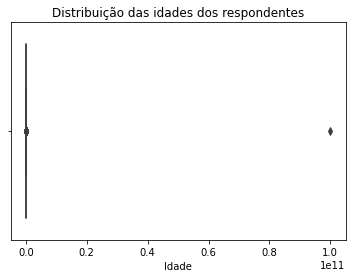

In [ ]:
sns.boxplot(x=data["Age"])
plt.title('Distribuição das idades dos respondentes')
plt.xlabel('Idade')
plt.show()

A distribuição apresenta uma escala muito grande, ou seja, provavelmente existem outliers na base de dados. Vamos olhar os valores únicos da coluna *Age*.

In [ ]:
data['Age'].unique() # mostra todos os valores únicos da variável Age

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

Temos muitos valores que não correspondem a uma idade humana adulta, como valores negativos, valores muito grandes ou muito pequenos (irei colocar uma linha de corte em 18 anos). Neste caso, irei substituí-los por None (valores não numéricos), e depois substituir esses valores pela mediana das idades dos respondentes.

In [ ]:
data.Age.replace(to_replace=[-29, 329, 99999999999, -1726, 5, 8, 11, -1], value = None, inplace=True)

In [ ]:
data.Age.fillna(data['Age'].median())

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

Agora, vamos analisar novamente a distribuição dos dados da variável *Age*. 

Boxplot

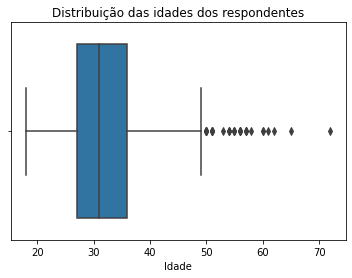

In [ ]:
sns.boxplot(x=data["Age"])
plt.title('Distribuição das idades dos respondentes')
plt.xlabel('Idade')
plt.show()

Histograma

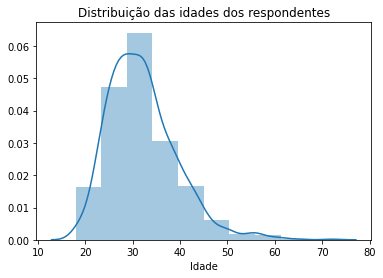

In [ ]:
sns.distplot(data['Age'], hist=True, bins = 10)
plt.title('Distribuição das idades dos respondentes')
plt.xlabel('Idade')
plt.show()

In [ ]:
data['Age'].describe()

count    1259.000000
mean       32.058777
std         7.278999
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

Teste de normalidade Shapiro-Wil

In [ ]:
stat, p = sct.shapiro(data['Age'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Provavelmente Normal')
else:
	print('Provavelmente não Normal')

stat=0.949, p=0.000
Provavelmente não Normal


Q-Q Plot

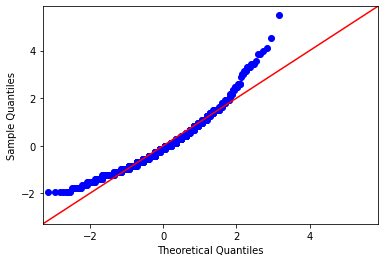

In [ ]:
sm.qqplot(data['Age'], fit=True, line="45")
plt.show()

Comparativo da média e da mediana

In [ ]:
data.Age.mean() > data.Age.median()

True

Agora conseguimos analisar a distribuição das idades no boxplot e histograma. Podemos ver que ele se tratam de dados assimétricos positivos ou com cauda maior à direita (podemos confirmar verificando que a média é maior que a mediana, conforme a célula acima), e que podemos rejeitar a hipótese de que os dados vêm de uma distribuição normal, devido ao *p-value* ser menor que o alfa (nível de significância de 5%), conforme teste de Shapiro-Wilk acima e a análise do Q-Q plot.

### Análise e transformações nas variáveis categóricas.

Análise de quantidade de valores únicos por variável.

In [ ]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)

Timestamp                    1246
comments                      160
Gender                         49
Country                        48
state                          45
no_employees                    6
leave                           5
work_interfere                  4
mental_vs_physical              3
wellness_program                3
phys_health_interview           3
benefits                        3
seek_help                       3
anonymity                       3
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
care_options                    3
obs_consequence                 2
tech_company                    2
remote_work                     2
treatment                       2
family_history                  2
self_employed                   2
dtype: int64

Pode-se perceber que algumas variáveis apresentam muitos valores únicos, e que a princípio, não poderiam haver tantos, como a variável **Gender**. Vamos ver a frequência de cada valor único na variável **Gender**.

In [ ]:
percent_value_counts(data, 'Gender')

,Total,Percent
Male,615,48.85
male,206,16.36
Female,121,9.61
M,116,9.21
female,62,4.92
F,38,3.02
m,34,2.70
f,15,1.19
Make,4,0.32
Male,3,0.24


Podemos perceber que existem diversos gêneros, porém muitos são erros de escrita ou diferentes formas de se referir ao mesmo gênero. Dessa forma, para esta análise, vamos organizar esta variável considerando 3 diferentes tipos: *Male*, *Female* e *Others*. 

As divisões terão *Male*, que irá conter as pessoas que se identificam como homem-cis, *Female* como mulher-cis e *Others* contendo as pessoas que se identificaram com as demais minorias de gênero.

Valores únicos da variável *Gender*.

In [ ]:
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Substituição dos valores únicos pelos seus representantes conforme divisão mencionada acima.

In [ ]:
data.Gender.replace(to_replace=['M', 'Male', 'male', 'm', 'Male-ish', 'maile',
       'something kinda male?', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Guy (-ish) ^_^', 
       'Male ', 'Man', 'msle', 'Mail', 'cis male',
       'Malr', 'Cis Man', 'ostensibly male, unsure what that really means'], value='Male', inplace=True)
data.Gender.replace(to_replace=['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female ',
                               'cis-female/femme', 'Female (cis)', 'femail'], value='Female', inplace=True)
data.Gender.replace(to_replace=['Trans-female', 'queer/she/they',
       'non-binary', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Androgyne', 'Agender',
       'male leaning androgynous', 'Trans woman', 'Neuter', 'Female (trans)',
       'queer', 'A little about you', 'p'], value='Others', inplace=True)

Visualização da distribuição dos valores da variável *Gender* após a transformação.

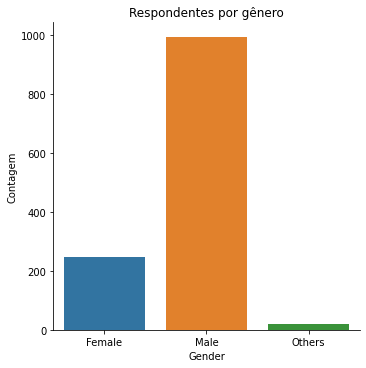

In [ ]:
sns.catplot(x="Gender", kind="count", data=data)
plt.title('Respondentes por gênero')
plt.ylabel('Contagem')
plt.show()

Agora que temos organizado a variável **Gender**, vamos dar uma olhada nas demais variáveis pertinentes as perguntas que queremos responder: **family_history**, **wellness_program**, **treatment**, **benefits** e **no_employees**.

In [ ]:
percent_value_counts(data, 'no_employees')

,Total,Percent
6-25,290,23.03
26-100,289,22.95
More than 1000,282,22.40
100-500,176,13.98
1-5,162,12.87
500-1000,60,4.77


In [ ]:
percent_value_counts(data, 'family_history')

,Total,Percent
No,767,60.92
Yes,492,39.08


In [ ]:
percent_value_counts(data, 'wellness_program')

,Total,Percent
No,842,66.88
Yes,229,18.19
Don't know,188,14.93


In [ ]:
percent_value_counts(data, 'treatment')

,Total,Percent
Yes,637,50.6
No,622,49.4


In [ ]:
percent_value_counts(data, 'benefits')

,Total,Percent
Yes,477,37.89
Don't know,408,32.41
No,374,29.71


As demais variáveis apresentam consistência e valores mais limpos.

## **Análise das hipóteses e perguntas levantadas**

Vamos começar então respondendo a primeira pergunta levantada: 

- Existe alguma associação entre profissionais que buscaram tratamento e o gênero no qual se identificam?

Nesse caso, **nossa hipótese nula** é: *não existe uma associação*.

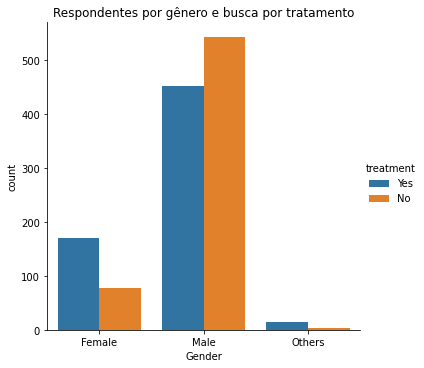

In [ ]:
ax = sns.catplot(x="Gender", hue="treatment", kind="count", data=data)
plt.title('Respondentes por gênero e busca por tratamento')
plt.show()

In [ ]:
table_t_g = pd.pivot_table(data, index = ['treatment'], columns = ['Gender'], aggfunc = 'size') # tabela de contingência
table_t_g

Gender,Female,Male,Others
treatment,,,
No,77,542,3
Yes,170,452,15


Teste de hipótese Pearson's Chi-Square:

In [ ]:
stat_t_g, p_t_g, dof_t_g, expected_t_g = sct.chi2_contingency(table_t_g)

alpha = 0.05
if p_t_g <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (falha em rejeitar H0)')

Dependente (rejeitar H0)


Como podemos ver, a quantidade de pessoas que se identificaram com os gêneros *Female* e *Others* tiveram maior frequência de respondentes que já buscaram tratamento, em comparação com os respondentes do gênero *Male*. 

Além disso, ao realizarmos o teste de Pearson's Chi-Square, de indepedência das variáveis categóricas, podemos perceber que foi rejeitado, e que portanto, sim, **existe uma associação entre o gênero e a busca por tratamento de saúde mental**.



---
A segunda pergunta que devemos responder é:

- Existe uma relação entre as pessoas colaboradoras que buscaram tratamento e que possuem histórico familiar de doenças mentais?

Nesse caso, **nossa hipótese nula** é: *não existe uma associação*.

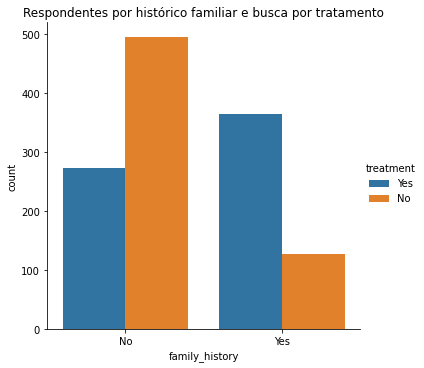

In [ ]:
ax = sns.catplot(x="family_history", hue="treatment", kind="count", data=data)
plt.title('Respondentes por histórico familiar e busca por tratamento')
plt.show()

In [ ]:
table_t_f = pd.pivot_table(data, index = ['treatment'], columns = ['family_history'], aggfunc = 'size') # tabela de contingência
table_t_f

family_history,No,Yes
treatment,,
No,495,127
Yes,272,365


Teste de hipótese Pearson's Chi-Square:

In [ ]:
stat_t_f, p_t_f, dof_t_f, expected_t_f = sct.chi2_contingency(table_t_f)

alpha = 0.05
if p_t_f <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (falha em rejeitar H0)')

Dependente (rejeitar H0)


Podemos perceber a notável diferença na frequência, entre os respondentes que disseram ter histórico na família de doenças mentais, e que já buscaram tratamento, em comparação aos que não tem histórico.

E também, ao realizar o teste Pearson's Chi-Square, podemos perceber que foi rejeitado, e que portanto, sim, **existe uma associação entre histórico familiar de doença mental e a busca por tratamento de saúde mental**.



---
Vamos olhar agora para a nossa terceira questão:

- O tamanho da empresa influencia na frequência de pessoas colaboradoras que buscaram tratamento para saúde mental?

Nesse caso, **nossa hipótese nula** é: *o tamanho da empresa não influencia na frequência de funcionários que buscaram tratamento*.


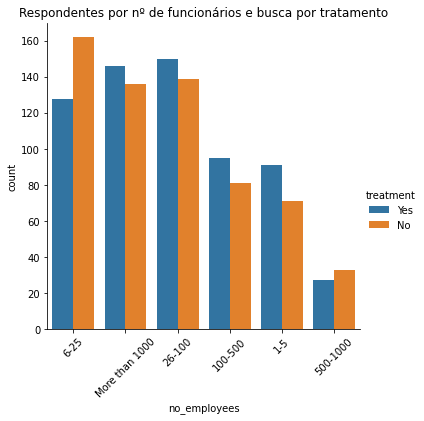

In [ ]:
ax = sns.catplot(x="no_employees", hue="treatment", kind="count", data=data)
plt.title('Respondentes por nº de funcionários e busca por tratamento')
ax.set_xticklabels(rotation=45)
plt.show()

In [ ]:
table_t_n = pd.pivot_table(data, index = ['treatment'], columns = ['no_employees'], aggfunc = 'size') # tabela de contingência
table_t_n

no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000
treatment,,,,,,
No,71,81,139,33,162,136
Yes,91,95,150,27,128,146


Teste de hipótese Pearson's Chi-Square:

In [ ]:
stat_t_n, p_t_n, dof_t_n, expected_t_n = sct.chi2_contingency(table_t_n)

alpha = 0.05
if p_t_n <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (falha em rejeitar H0)')

Independente (falha em rejeitar H0)


O que podemos perceber é que, entre os respondentes que a empresa tem de *6-25* e *500-1000* funcionários, a parte maior são de pessoas que nunca buscaram tratamento. As demais, todas tiveram mais de 50% dos respondentes que já buscaram tratamento para doenças mentais.

E junto a isso, o teste de Pearson's Chi-Square também mostra que **não há dependência entre as duas variáveis, e portanto, não podemos rejeitar a hipótese nula levantada**.


---

A nossa quarta questão é:

- As empresas que possuem programas de bem-estar tem uma frequência menor de respondentes que buscaram tratamento para doenças mentais?

Sendo então, nossa hipótese nula: *não existe uma associação entre as variáveis*

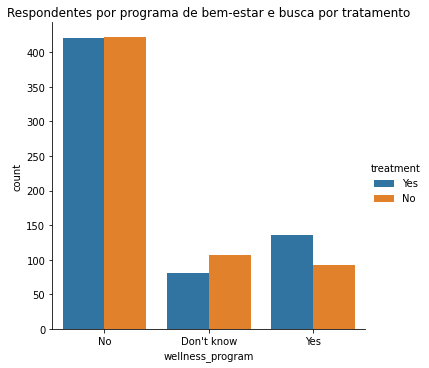

In [ ]:
ax = sns.catplot(x="wellness_program", hue="treatment", kind="count", data=data)
plt.title('Respondentes por programa de bem-estar e busca por tratamento')
plt.show()

In [ ]:
table_t_w = pd.pivot_table(data, index = ['treatment'], columns = ['wellness_program'], aggfunc = 'size') # tabela de contingência
table_t_w

wellness_program,Don't know,No,Yes
treatment,,,
No,107,422,93
Yes,81,420,136


Teste de hipótese Pearson's Chi-Square:

In [ ]:
stat_t_w, p_t_w, dof_t_w, expected_t_w = sct.chi2_contingency(table_t_w)

alpha = 0.05
if p_t_w <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (falha em rejeitar H0)')

Dependente (rejeitar H0)


Como podemos ver, dentre os respondentes que disseram que suas empresas possuem programas de bem-estar, a maioria já buscou tratamento para doenças mentais. Dentre os que não sabem se a empresa possui um programa deste tipo, a maior parte nunca buscou tratamento. E por fim, dentre os que disseram que a empresa não possui tal programa, apesar de ter praticamente o mesmo número entre os que já buscaram e nunca buscaram, os que nunca buscaram são maioria.

Neste caso, vemos que uma empresa possuir um programa de bem-estar, não quer dizer que uma frequência menor de seus funcionários busquem tratamento para doenças mentais.

O teste Pearson's Chi-Square, nesse caso, **rejeita a hipótese e mostra que sim, há uma dependência entra as variáveis**.


---
A última questão é:

- As empresas que possuem benefícios para saúde mental tem uma frequência menor de respondentes que buscaram tratamento para doenças mentais?

A nossa hipótese nula nesse caso é: *não existe uma associação entre as duas variáveis*.


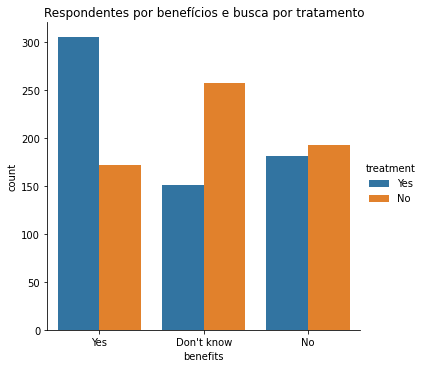

In [ ]:
ax = sns.catplot(x="benefits", hue="treatment", kind="count", data=data)
plt.title('Respondentes por benefícios e busca por tratamento')
plt.show()

In [ ]:
table_t_b = pd.pivot_table(data, index = ['treatment'], columns = ['benefits'], aggfunc = 'size') # tabela de contingência
table_t_b

benefits,Don't know,No,Yes
treatment,,,
No,257,193,172
Yes,151,181,305


Teste de hipótese Pearson's Chi-Square:

In [ ]:
stat_t_b, p_t_b, dof_t_b, expected_t_b = sct.chi2_contingency(table_t_b)

alpha = 0.05
if p_t_b <= alpha:
	print('Dependente (rejeitar H0)')
else:
	print('Independente (falha em rejeitar H0)')

Dependente (rejeitar H0)


Podemos perceber que na verdade é o contrário. Dos respondentes que trabalham em uma empresa que possui benefícios para saúde mental, uma grande parte dos mesmos disseram ter buscado tratamento, em comparação aos respondentes que não sabiam se a empresa possuía tal benefício ou que confirmaram que a empresa não tinha, em que a maioria nunca buscou tratamento para saúde mental.

O teste Pearson's Chi-Square apresenta então, que sim, **realmente há dependência, e que podemos rejeitar a hipótese nula**.

# **Análise final**

### O objetivo da EDA foi de apresentar informações sobre doenças mentais no local de trabalho para as pessoas que estão buscando dados sobre empresas no site de *review*.

### Os dados de entrada estavam em formato tabular, em arquivo .csv, com 27 colunas e 1259 registros.

### A linguagem escolhida para realizar a EDA foi **python**, devido as inúmeras bibliotecas e maior conhecimento da syntax por parte do autor.

### **As informações, em resumo, que iremos passar para o público-alvo são**:

### - Ao contrário dos homens cis, mulheres cis e demais gêneros, que são minorias, têm maior frequência, dentro de seu grupo, de busca por tratamento para saúde mental;

### - Dentre os que possuem histórico familiar de doenças mentais, grande parte busca por tratamento para saúde mental;

### - O tamanho de uma empresa não influencia na frequência de pessoas colaboradoras que buscam por tratamento de saúde mental;

### - Empresas que têm programas de bem-estar possuem mais pessoas colaboradoras que buscam tratamento para saúde mental em comparação as empresas que não possuem;

### - Empresas que possuem benefícios para saúde mental, apresentam maior frequência de pessoas colaboradoras que buscam por tratamento para a mesma.
